In [68]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [71]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [72]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [73]:
df.duplicated().sum()

0

In [74]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [75]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [76]:
print(" THE VALUE OF THE GENDER   " ,end="  " )
print(df['gender'].unique())

print(" THE VALUE OF THE race/ethnicity " ,end=" ")
print(df['race/ethnicity'].unique())

print(" THE VALUE OF THE level of Education " ,end=" ")
print(df['parental level of education'].unique())

print(" THE VALUE OF THE Lunch " ,end=" ")
print(df['lunch'].unique())


print(" THE VALUE OF THE test course " ,end=" ")
print(df['test preparation course'].unique())


 THE VALUE OF THE GENDER     ['female' 'male']
 THE VALUE OF THE race/ethnicity  ['group B' 'group C' 'group A' 'group D' 'group E']
 THE VALUE OF THE level of Education  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 THE VALUE OF THE Lunch  ['standard' 'free/reduced']
 THE VALUE OF THE test course  ['none' 'completed']


In [77]:
numerical_featuers=[features for features in df.columns if df[features].dtype != 'O']
categorical_featuers=[features for features in df.columns if df[features].dtype == 'O']

In [78]:
numerical_featuers

['math score', 'reading score', 'writing score']

In [79]:
categorical_featuers

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

Feature Engineering

In [80]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [81]:
reading_full=df[df['reading score'] == 100]['average'].count()
print(f"{reading_full}")
writing_full=df[df['writing score'] == 100]['average'].count()
print(f"{writing_full}")
Average_full=df[df['math score'] == 100]['average'].count()
print(f"{Average_full}")

17
14
7


<Axes: xlabel='average', ylabel='Count'>

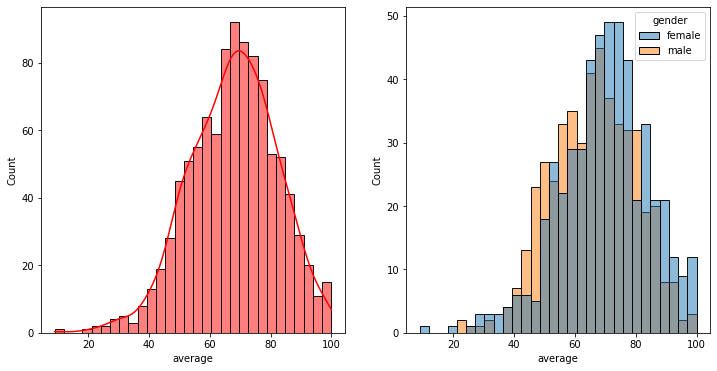

In [82]:
fig,axs=plt.subplots(1,2,figsize=(12,6))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,hue='gender')


<Axes: xlabel='total_score', ylabel='Count'>

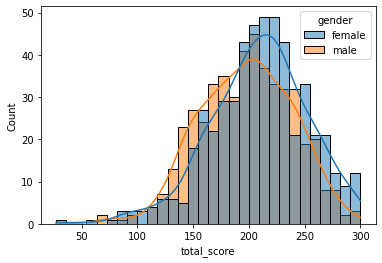

In [83]:
sns.histplot(data=df,x='total_score',bins=30,hue='gender',kde=True)

In [85]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [89]:
new_df=df
new_df.to_csv('model_training_file.csv',index=False)



In [ ]:
new